In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from influxdb import DataFrameClient

In [2]:
plt.rcParams['figure.figsize'] = [20, 15] 

In [3]:
host = 'localhost'
port = 8086
user = 'root'
password = 'root'
dbname = 'VirtualBuilding'
client = DataFrameClient(host, port, user, password, dbname)

In [134]:
outdoor_temp=client.query('select * from "Outdoor:Temp"')['Outdoor:Temp']['value']
print((tmp))


2017-03-31 23:00:00+00:00    12.766667
2017-04-01 00:00:00+00:00    10.158333
2017-04-01 01:00:00+00:00    10.083333
2017-04-01 02:00:00+00:00     9.883333
2017-04-01 03:00:00+00:00    10.325000
                               ...    
2020-11-30 17:39:26+00:00    21.058333
2020-11-30 17:39:28+00:00    18.991667
2020-11-30 17:39:29+00:00    17.558333
2020-11-30 17:39:31+00:00    16.458333
2020-11-30 17:39:33+00:00    15.183333
Name: value, Length: 1167, dtype: float64


In [135]:
bedroom_mean=client.query('select * from "Zone_bedroom:Temp_mean"')['Zone_bedroom:Temp_mean']['value']
bathroom_mean=client.query('select * from "Zone_bathroom:Temp_mean"')['Zone_bathroom:Temp_mean']['value']
kitchen_mean=client.query('select * from "Zone_kitchen:Temp_mean"')['Zone_kitchen:Temp_mean']['value']

bedroom_mean.rename('bedroom',inplace=True)
bathroom_mean.rename('bathroom',inplace=True)
kitchen_mean.rename('kitchen',inplace=True)

2017-03-31 23:00:00+00:00    24.946207
2017-04-01 00:00:00+00:00    24.394490
2017-04-01 01:00:00+00:00    24.114852
2017-04-01 02:00:00+00:00    23.832393
2017-04-01 03:00:00+00:00    23.610539
                               ...    
2020-11-30 17:39:26+00:00    26.000000
2020-11-30 17:39:27+00:00    26.000000
2020-11-30 17:39:29+00:00    26.000000
2020-11-30 17:39:31+00:00    26.000000
2020-11-30 17:39:33+00:00    25.977041
Name: kitchen, Length: 1168, dtype: float64

In [136]:
list_of_series=[bedroom_mean,\
                bathroom_mean,\
                kitchen_mean]
kitchen_mean.index

DatetimeIndex(['2017-03-31 23:00:00+00:00', '2017-04-01 00:00:00+00:00',
               '2017-04-01 01:00:00+00:00', '2017-04-01 02:00:00+00:00',
               '2017-04-01 03:00:00+00:00', '2017-04-01 04:00:00+00:00',
               '2017-04-01 05:00:00+00:00', '2017-04-01 06:00:00+00:00',
               '2017-04-01 07:00:00+00:00', '2017-04-01 08:00:00+00:00',
               ...
               '2020-11-30 17:39:16+00:00', '2020-11-30 17:39:18+00:00',
               '2020-11-30 17:39:20+00:00', '2020-11-30 17:39:22+00:00',
               '2020-11-30 17:39:24+00:00', '2020-11-30 17:39:26+00:00',
               '2020-11-30 17:39:27+00:00', '2020-11-30 17:39:29+00:00',
               '2020-11-30 17:39:31+00:00', '2020-11-30 17:39:33+00:00'],
              dtype='datetime64[ns, UTC]', length=1168, freq=None)

In [137]:
df = pd.DataFrame(list_of_series,columns=bedroom_mean.index).transpose()
df.dropna(inplace=True)
df

,bedroom,bathroom,kitchen
2017-03-31 23:00:00+00:00,23.400046,24.340571,24.946207
2017-04-01 00:00:00+00:00,23.003843,23.953833,24.394490
2017-04-01 01:00:00+00:00,22.831192,23.721700,24.114852
2017-04-01 02:00:00+00:00,22.647934,23.485598,23.832393
2017-04-01 03:00:00+00:00,22.517181,23.290817,23.610539
...,...,...,...
2020-11-30 17:39:22+00:00,24.840858,26.000000,26.000000
2020-11-30 17:39:27+00:00,24.034808,26.000000,26.000000
2020-11-30 17:39:29+00:00,23.863408,26.000000,26.000000
2020-11-30 17:39:31+00:00,23.815794,25.954044,26.000000


In [138]:
df['mean_indoors'] = df.mean(1)
df.head(4)

,bedroom,bathroom,kitchen,mean_indoors
2017-03-31 23:00:00+00:00,23.400046,24.340571,24.946207,24.228941
2017-04-01 00:00:00+00:00,23.003843,23.953833,24.394490,23.784055
2017-04-01 01:00:00+00:00,22.831192,23.721700,24.114852,23.555914
2017-04-01 02:00:00+00:00,22.647934,23.485598,23.832393,23.321975


In [139]:
df['mean_outdoors'] = outdoor_temp 
df.dropna(inplace=True)
df

,bedroom,bathroom,kitchen,mean_indoors,mean_outdoors
2017-03-31 23:00:00+00:00,23.400046,24.340571,24.946207,24.228941,12.766667
2017-04-01 00:00:00+00:00,23.003843,23.953833,24.394490,23.784055,10.158333
2017-04-01 01:00:00+00:00,22.831192,23.721700,24.114852,23.555914,10.083333
2017-04-01 02:00:00+00:00,22.647934,23.485598,23.832393,23.321975,9.883333
2017-04-01 03:00:00+00:00,22.517181,23.290817,23.610539,23.139512,10.325000
...,...,...,...,...,...
2020-11-30 17:39:20+00:00,25.021001,26.000000,26.000000,25.673667,22.725000
2020-11-30 17:39:22+00:00,24.840858,26.000000,26.000000,25.613619,22.308333
2020-11-30 17:39:29+00:00,23.863408,26.000000,26.000000,25.287803,17.558333
2020-11-30 17:39:31+00:00,23.815794,25.954044,26.000000,25.256613,16.458333


In [140]:
df['delta_T'] = df['mean_indoors'] - df['mean_outdoors']
df

,bedroom,bathroom,kitchen,mean_indoors,mean_outdoors,delta_T
2017-03-31 23:00:00+00:00,23.400046,24.340571,24.946207,24.228941,12.766667,11.462275
2017-04-01 00:00:00+00:00,23.003843,23.953833,24.394490,23.784055,10.158333,13.625722
2017-04-01 01:00:00+00:00,22.831192,23.721700,24.114852,23.555914,10.083333,13.472581
2017-04-01 02:00:00+00:00,22.647934,23.485598,23.832393,23.321975,9.883333,13.438641
2017-04-01 03:00:00+00:00,22.517181,23.290817,23.610539,23.139512,10.325000,12.814512
...,...,...,...,...,...,...
2020-11-30 17:39:20+00:00,25.021001,26.000000,26.000000,25.673667,22.725000,2.948667
2020-11-30 17:39:22+00:00,24.840858,26.000000,26.000000,25.613619,22.308333,3.305286
2020-11-30 17:39:29+00:00,23.863408,26.000000,26.000000,25.287803,17.558333,7.729469
2020-11-30 17:39:31+00:00,23.815794,25.954044,26.000000,25.256613,16.458333,8.798279


In [141]:
power=client.query('select * from Power')['Power']['value']
power

2017-03-31 23:00:00+00:00    0.045749
2017-04-01 00:00:00+00:00    0.045749
2017-04-01 01:00:00+00:00    0.045749
2017-04-01 02:00:00+00:00    0.045749
2017-04-01 03:00:00+00:00    0.045749
                               ...   
2020-11-30 17:39:25+00:00    0.081676
2020-11-30 17:39:27+00:00    0.551131
2020-11-30 17:39:29+00:00    0.589138
2020-11-30 17:39:31+00:00    0.584071
2020-11-30 17:39:32+00:00    0.565746
Name: value, Length: 1167, dtype: float64

In [142]:
df['Power']=power
df.head()

,bedroom,bathroom,kitchen,mean_indoors,mean_outdoors,delta_T,Power
2017-03-31 23:00:00+00:00,23.400046,24.340571,24.946207,24.228941,12.766667,11.462275,0.045749
2017-04-01 00:00:00+00:00,23.003843,23.953833,24.394490,23.784055,10.158333,13.625722,0.045749
2017-04-01 01:00:00+00:00,22.831192,23.721700,24.114852,23.555914,10.083333,13.472581,0.045749
2017-04-01 02:00:00+00:00,22.647934,23.485598,23.832393,23.321975,9.883333,13.438641,0.045749
2017-04-01 03:00:00+00:00,22.517181,23.290817,23.610539,23.139512,10.325000,12.814512,0.045749


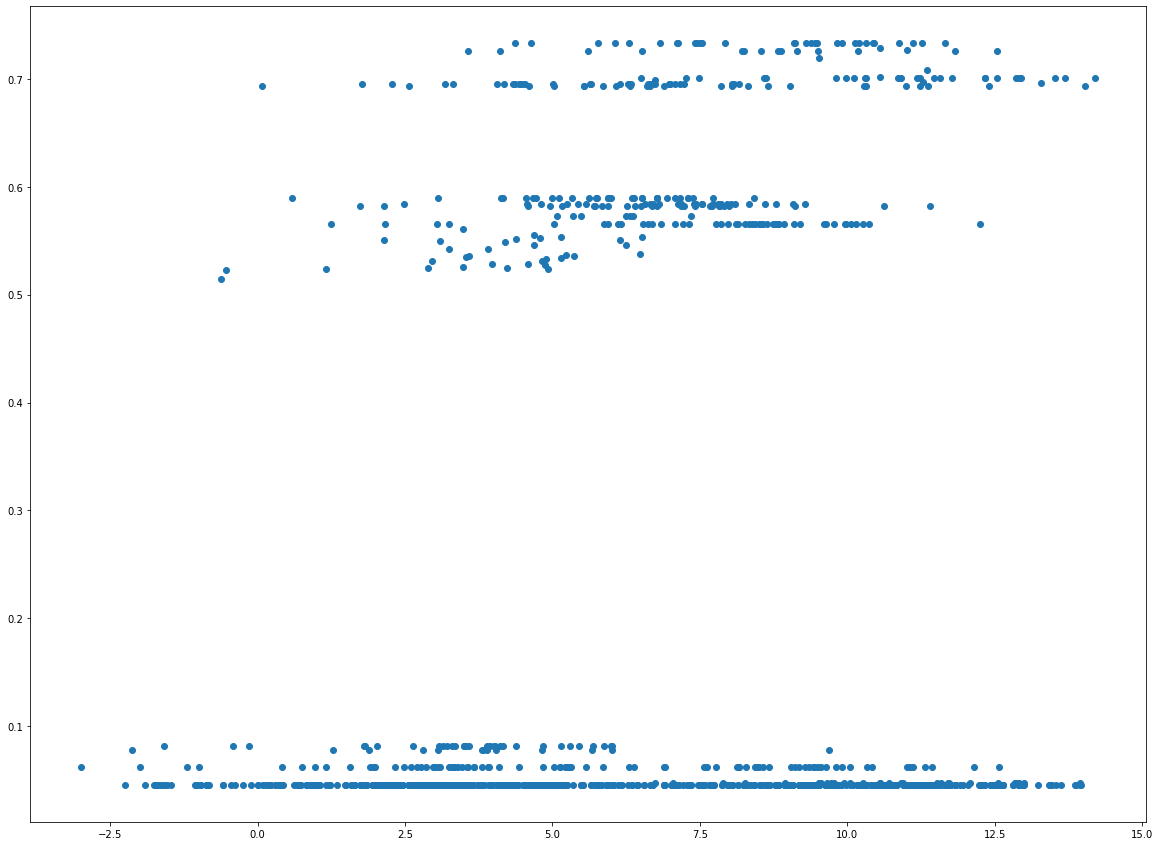

In [147]:
plt.scatter(df.delta_T,df.Power)

In [149]:
model = sm.OLS(df.Power,sm.add_constant(df.delta_T))

In [150]:
results=model.fit()

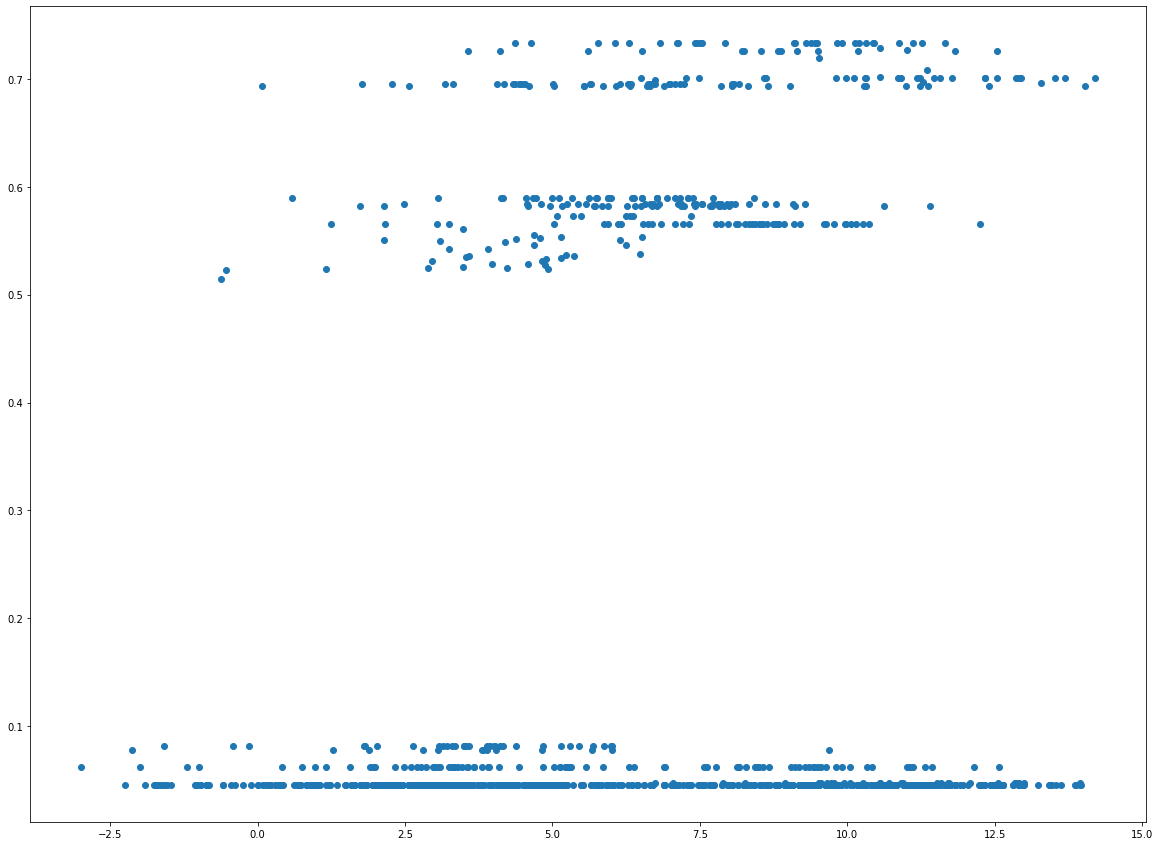

In [151]:
plt.plot(df.delta_T,results.predict(),'r')
plt.scatter(df.delta_T,df.Power)

In [152]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                nan
Time:                        10:58:32   Log-Likelihood:                    nan
No. Observations:                1135   AIC:                               nan
Df Residuals:                    1133   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
delta_T           nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
df=df.resample('H').mean()
df=df.dropna()

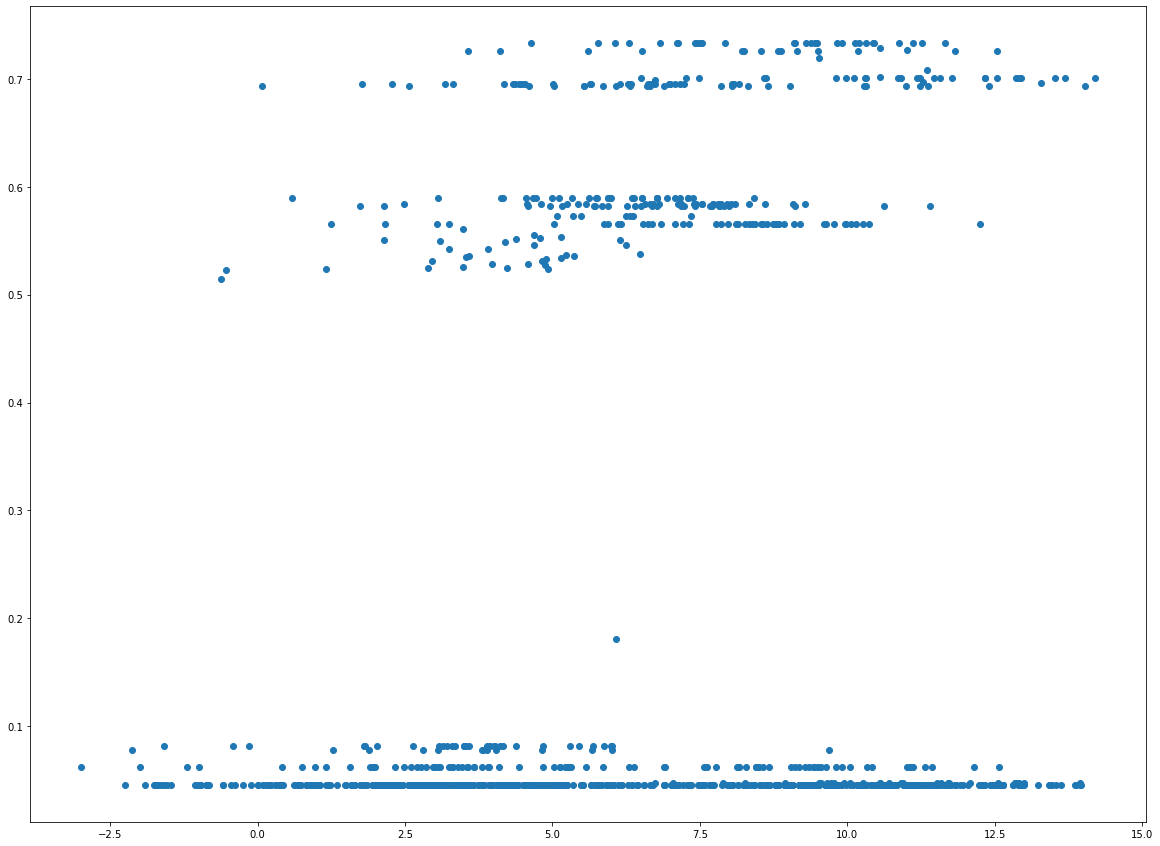

In [154]:
plt.scatter(df.delta_T,df.Power)

In [155]:
model = sm.OLS(df.Power,sm.add_constant(df.delta_T))

In [156]:
results=model.fit()

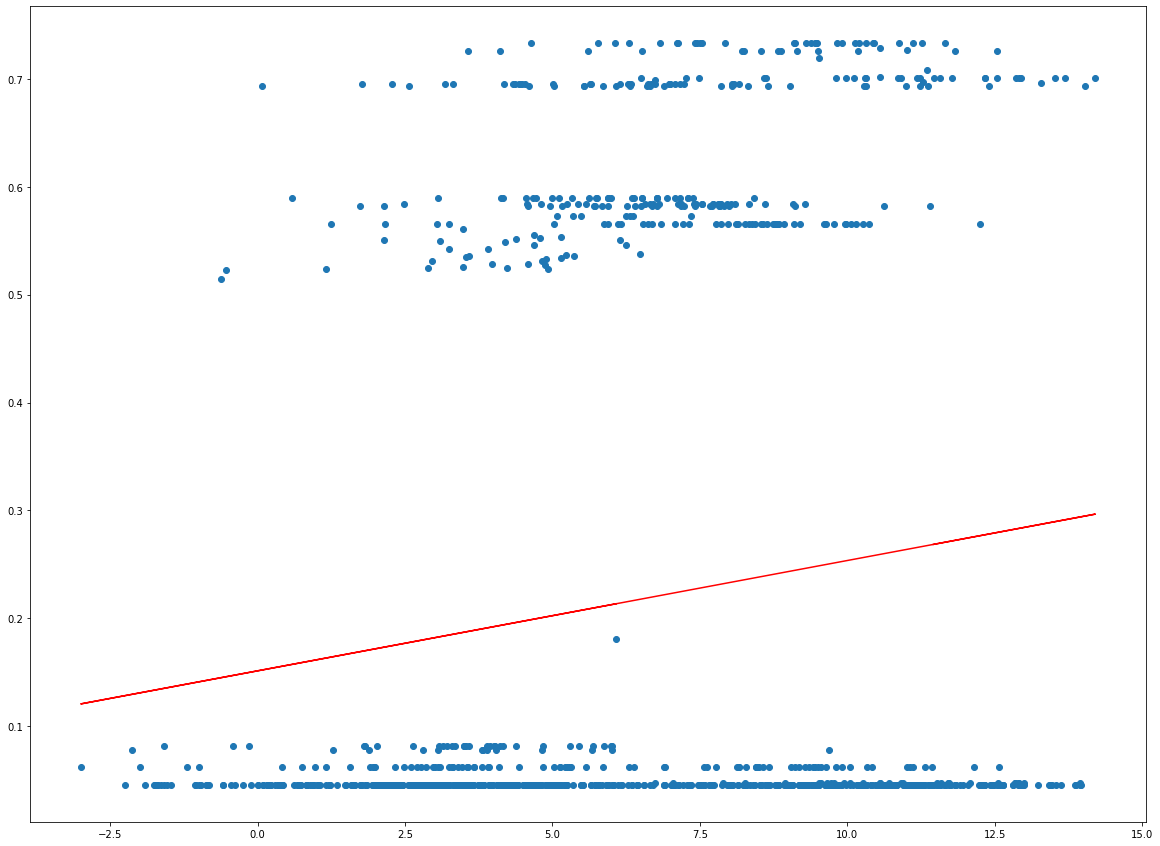

In [157]:
plt.plot(df.delta_T,results.predict(),'r')
plt.scatter(df.delta_T,df.Power)

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     4701.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:12:57   Log-Likelihood:                -18535.
No. Observations:                5472   AIC:                         3.707e+04
Df Residuals:                    5470   BIC:                         3.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2870      0.240    -13.705      0.000      -3.757      -2.817
deltaT         1.3493      0.020     68.563      0.000       1.311       1.388
==============================================================================
Omnibus:                      136.328   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.284
Skew:                          -0.367   Prob(JB):                     2.32e-33
Kurtosis:                       3.347   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
df=df.resample('D').mean()
df=df.dropna()

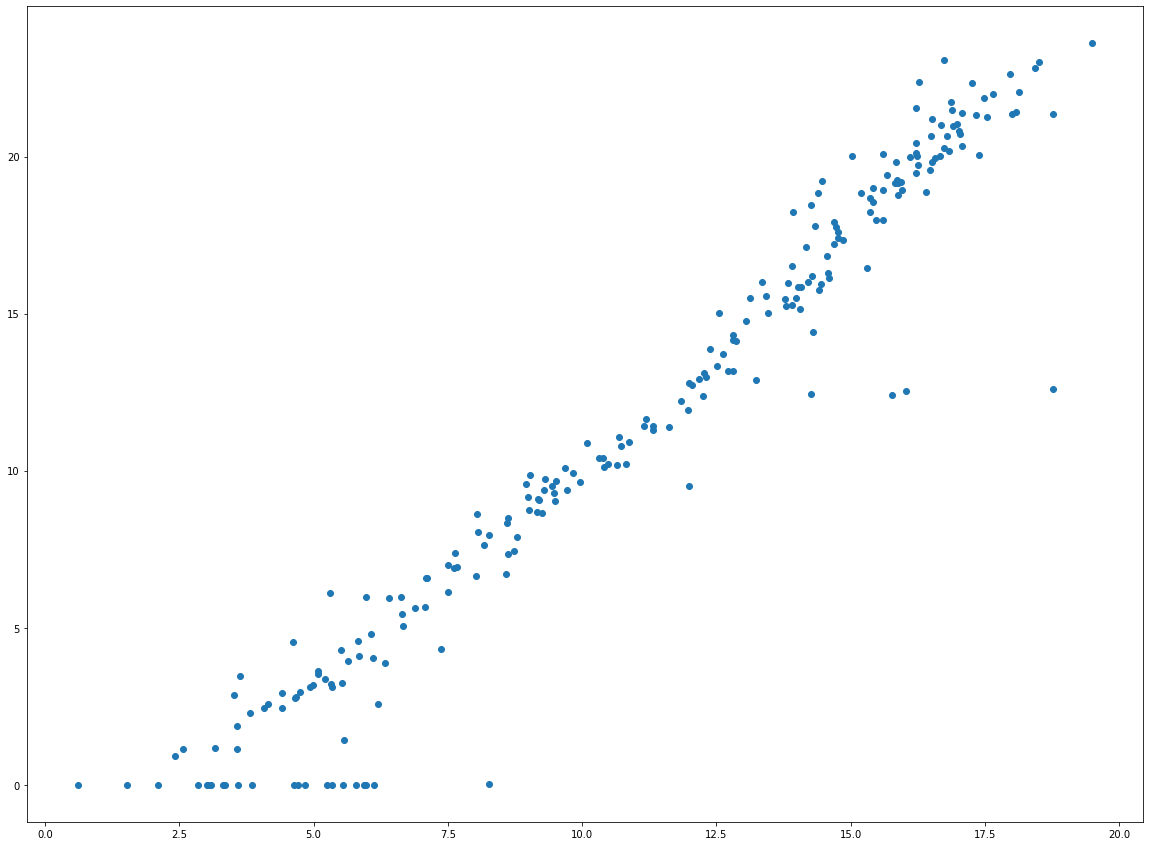

In [24]:
plt.scatter(df.deltaT,df.Power)

In [25]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [26]:
results=model.fit()

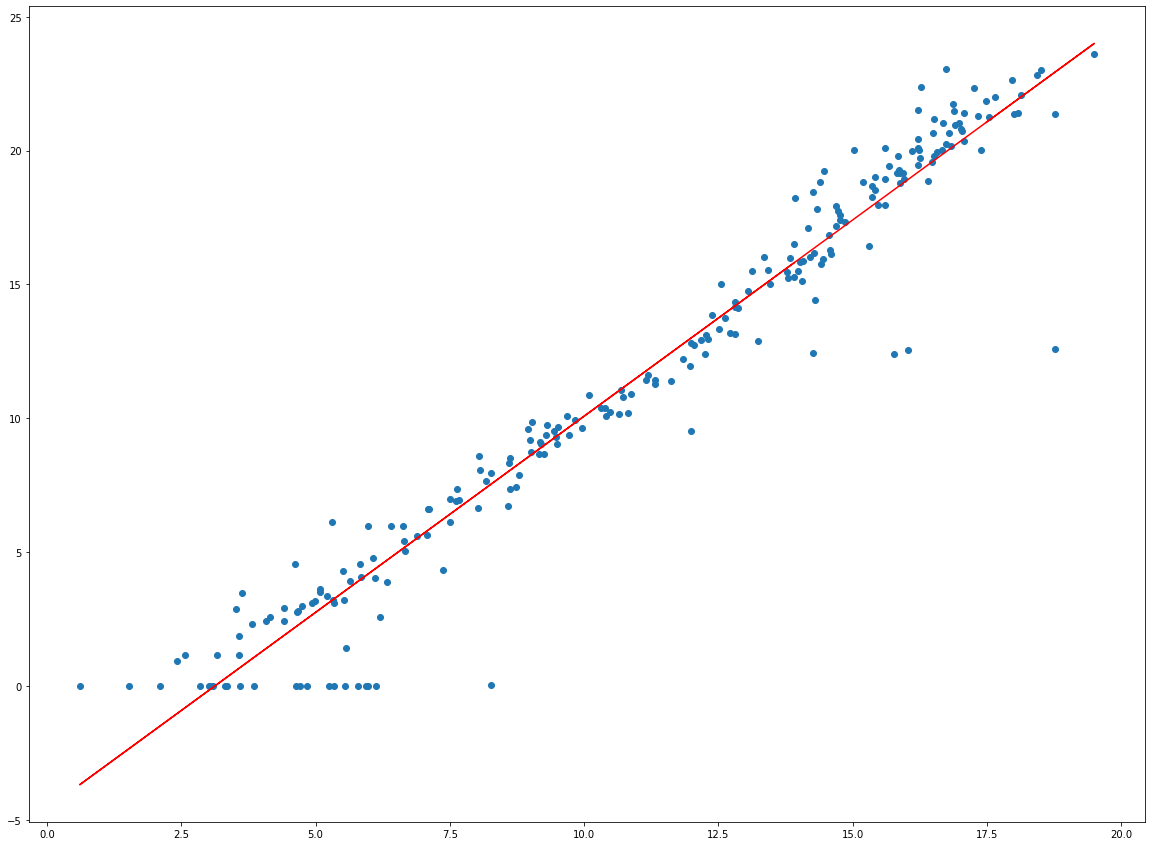

In [27]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     4297.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          2.98e-151
Time:                        17:12:59   Log-Likelihood:                -442.87
No. Observations:                 233   AIC:                             889.7
Df Residuals:                     231   BIC:                             896.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5836      0.270    -17.005      0.000      -5.115      -4.052
deltaT         1.4664      0.022     65.549      0.000       1.422       1.510
==============================================================================
Omnibus:                      140.688   Durbin-Watson:                   0.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1164.676
Skew:                          -2.275   Prob(JB):                    1.24e-253
Kurtosis:                      12.963   Cond. No.                         30.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
df=df.resample('W').mean()
df=df.dropna()

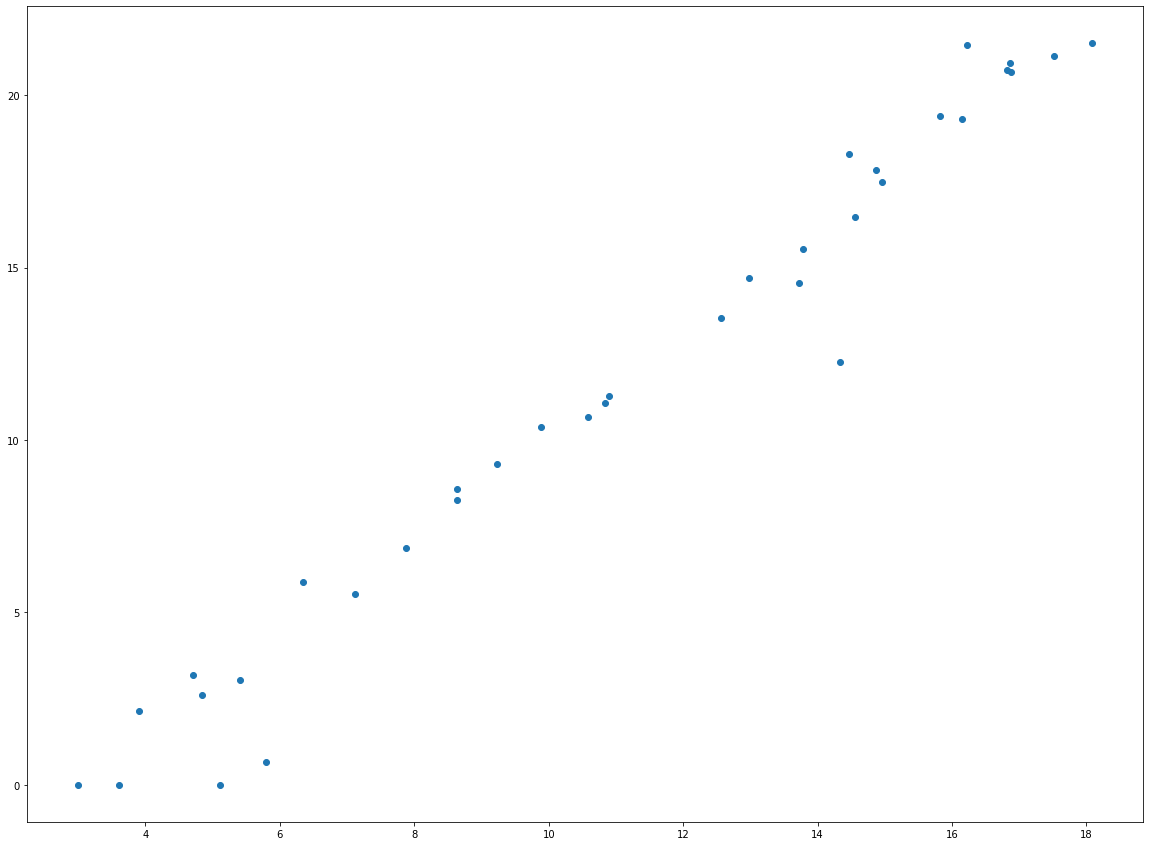

In [30]:
plt.scatter(df.deltaT,df.Power)


In [31]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [32]:
results=model.fit()

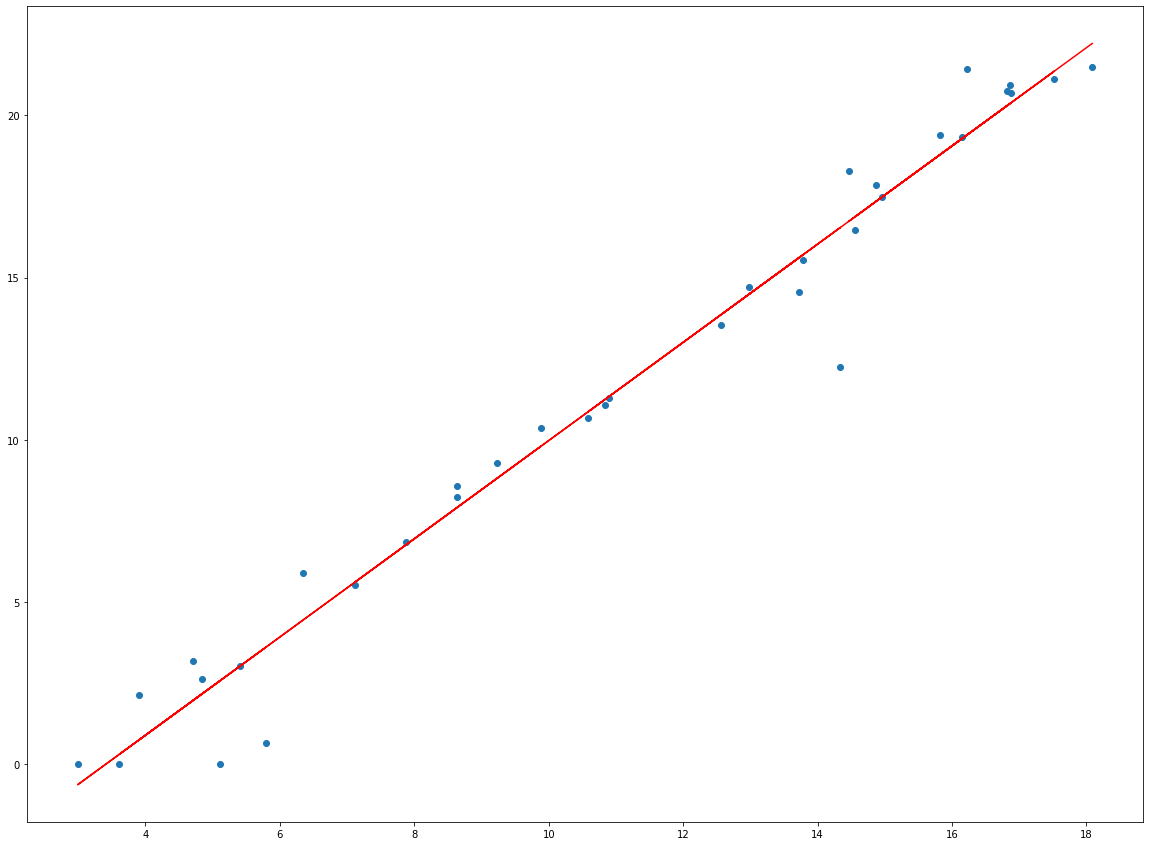

In [33]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1129.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           4.21e-27
Time:                        17:13:01   Log-Likelihood:                -56.267
No. Observations:                  35   AIC:                             116.5
Df Residuals:                      33   BIC:                             119.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1572      0.541     -9.539      0.000      -6.257      -4.057
deltaT         1.5136      0.045     33.602      0.000       1.422       1.605
==============================================================================
Omnibus:                       22.376   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.659
Skew:                          -1.660   Prob(JB):                     1.81e-08
Kurtosis:                       6.664   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""